<a href="https://colab.research.google.com/github/manjirikulkarni03/cardiovascular_risk_prediction/blob/main/Manjiri_data_cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [104]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# code to see the execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.3 s (started: 2023-02-20 15:54:28 +00:00)


### Dataset Loading

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 7.64 s (started: 2023-02-20 15:54:34 +00:00)


In [106]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

time: 62.9 ms (started: 2023-02-20 15:54:41 +00:00)


### Dataset First View

In [107]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


time: 45.1 ms (started: 2023-02-20 15:54:41 +00:00)


In [108]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


time: 43 ms (started: 2023-02-20 15:54:41 +00:00)


### Dataset Rows & Columns count

In [109]:
# Dataset Rows & Columns count
print(f"Rows={df.shape[0]}, Columns={df.shape[1]}") 

Rows=3390, Columns=17
time: 2.61 ms (started: 2023-02-20 15:54:41 +00:00)


### Dataset Information

In [110]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [111]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

time: 539 ms (started: 2023-02-20 15:54:42 +00:00)


This means we are not having any duplicate value in our dataset.

#### Missing Values/Null Values

In [112]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

time: 8.9 ms (started: 2023-02-20 15:54:42 +00:00)


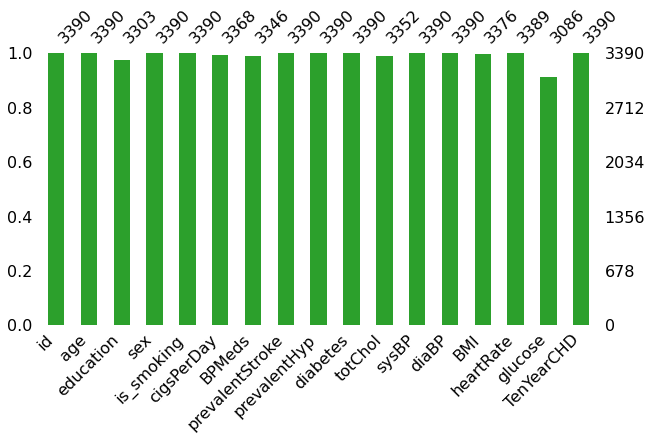

time: 1.8 s (started: 2023-02-20 15:54:42 +00:00)


In [113]:
# Visualizing the missing values
msno.bar(df,figsize=(10,5), color="tab:green")

### What did you know about your dataset?

1. Our dataset contains 3390 rows and 17 columns.
2. It contains null values in total 7 features Viz.Education,CigsPerDay,BPMeds,totChol,BMI,heartRate,Glucose etc.
3. It do not contain any duplicate value.
4. There are total 6 categorical features in our dataset Viz. sex,is_smoking,BPMeds,PrevalentStroke,prevalentHyp,diabetes etc.
5. dataset contain features having different dtypes(int,float,object) which we need to further deal with.

## ***2. Understanding Your Variables***

In [114]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

time: 7.98 ms (started: 2023-02-20 15:54:44 +00:00)


In [115]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


time: 82.9 ms (started: 2023-02-20 15:54:44 +00:00)


### Variables Description 

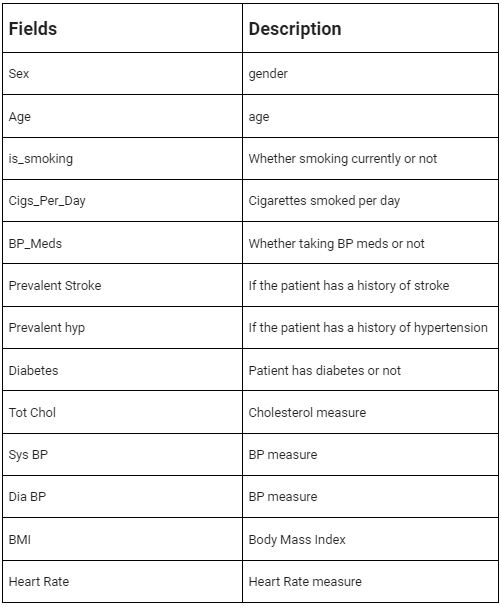

### Check Unique Values for each variable.

In [116]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'Unique values of i are {df[i].unique()}')

Unique values of i are [   0    1    2 ... 3387 3388 3389]
Unique values of i are [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
Unique values of i are [ 2.  4.  1.  3. nan]
Unique values of i are ['F' 'M']
Unique values of i are ['YES' 'NO']
Unique values of i are [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
Unique values of i are [ 0. nan  1.]
Unique values of i are [0 1]
Unique values of i are [0 1]
Unique values of i are [0 1]
Unique values of i are [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209

## 3. ***Data Wrangling***

### Data Wrangling Code

In [117]:
# Write your code to make your dataset analysis ready.

time: 473 µs (started: 2023-02-20 15:54:44 +00:00)


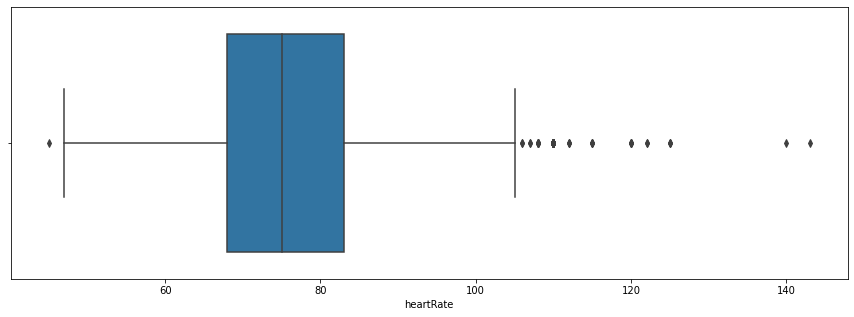

time: 251 ms (started: 2023-02-20 15:54:44 +00:00)


In [118]:
# plotting seaborn box plot to check the outliers in heartRate feature
plt.figure(figsize=(15,5))
sns.boxplot(x=df["heartRate"])

In [119]:
df[df['heartRate'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1388,1388,64,1.0,M,YES,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


time: 23 ms (started: 2023-02-20 15:54:44 +00:00)


In [120]:
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

time: 2.2 ms (started: 2023-02-20 15:54:44 +00:00)


In [121]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 11.9 ms (started: 2023-02-20 15:54:44 +00:00)


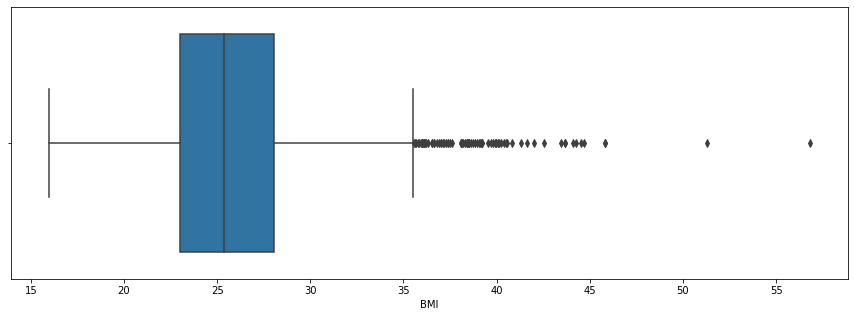

time: 236 ms (started: 2023-02-20 15:54:44 +00:00)


In [122]:
# plotting seaborn box plot to check the outliers in BMI feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["BMI"])

In [123]:
df['BMI'].fillna(df['BMI'].median(),inplace=True)

time: 2.12 ms (started: 2023-02-20 15:54:45 +00:00)


In [124]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 8.57 ms (started: 2023-02-20 15:54:45 +00:00)


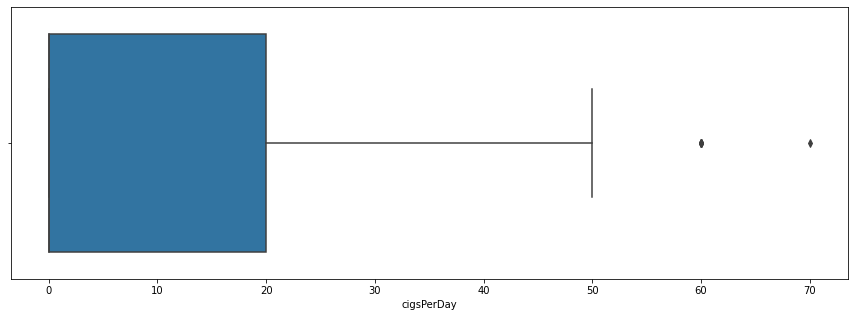

time: 243 ms (started: 2023-02-20 15:54:45 +00:00)


In [125]:
# plotting seaborn box plot to check the outliers in cigsPerDay feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["cigsPerDay"])

In [126]:
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)

time: 1.98 ms (started: 2023-02-20 15:54:45 +00:00)


In [127]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 7.92 ms (started: 2023-02-20 15:54:45 +00:00)


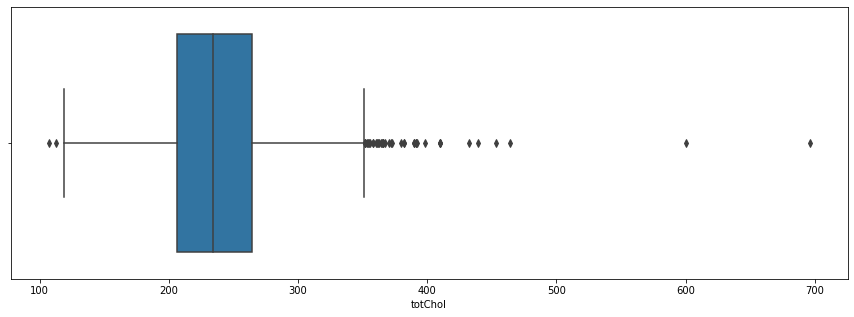

time: 238 ms (started: 2023-02-20 15:54:45 +00:00)


In [128]:
# plotting seaborn box plot to check the outliers in totChol feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["totChol"])

In [129]:
df['totChol'].fillna(df['totChol'].median(),inplace=True)

time: 4.1 ms (started: 2023-02-20 15:54:45 +00:00)


In [130]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 13.6 ms (started: 2023-02-20 15:54:45 +00:00)


In [131]:
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)

time: 4.46 ms (started: 2023-02-20 15:54:45 +00:00)


In [132]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 12.7 ms (started: 2023-02-20 15:54:45 +00:00)


In [133]:
df['education'].fillna(df['education'].mode()[0],inplace=True)

time: 3.72 ms (started: 2023-02-20 15:54:45 +00:00)


In [134]:
df.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

time: 12 ms (started: 2023-02-20 15:54:45 +00:00)


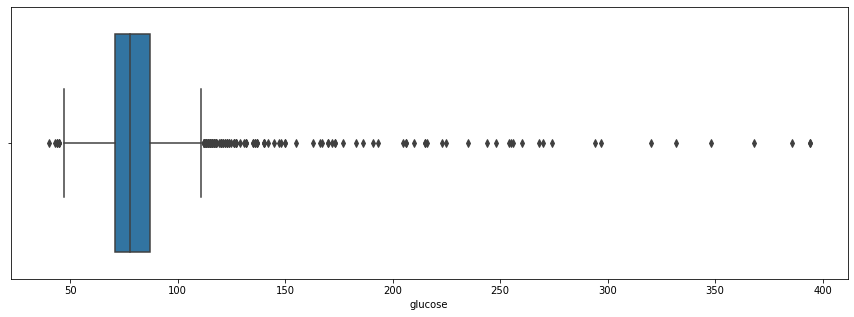

time: 279 ms (started: 2023-02-20 15:54:45 +00:00)


In [135]:
# plotting seaborn box plot to check the outliers in glucose feature
plt.figure(figsize=(15,5))
sns.boxplot(x= df["glucose"])

In [136]:
df['glucose'].fillna(df['glucose'].median(),inplace=True)

time: 3.59 ms (started: 2023-02-20 15:54:46 +00:00)


In [137]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

time: 11.2 ms (started: 2023-02-20 15:54:46 +00:00)


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1(Visualizing the target variable)

0    2879
1     511
Name: TenYearCHD, dtype: int64


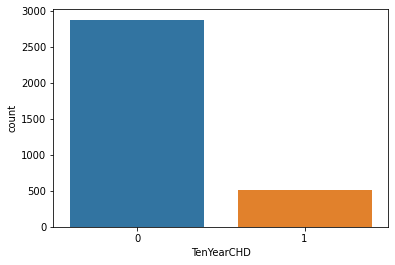

time: 143 ms (started: 2023-02-20 15:54:46 +00:00)


In [139]:
# Chart - 1 visualization code
y = df["TenYearCHD"]

sns.countplot(y)


target_temp = df.TenYearCHD.value_counts()

print(target_temp)

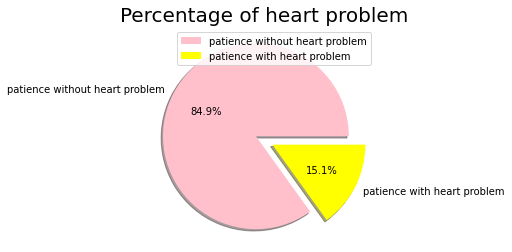

time: 101 ms (started: 2023-02-20 15:54:46 +00:00)


In [140]:
labels = 'patience without heart problem' , 'patience with heart problem'
sizes = df.TenYearCHD.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of heart problem",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2(Frequency distribution of some categorical features over the people suffering from heart disease)

F    1684
M    1195
Name: sex, dtype: int64
NO     1467
YES    1412
Name: is_smoking, dtype: int64
0    2867
1      12
Name: prevalentStroke, dtype: int64
0    2065
1     814
Name: prevalentHyp, dtype: int64
0.0    2812
1.0      67
Name: BPMeds, dtype: int64
0    2825
1      54
Name: diabetes, dtype: int64


Text(0.5, 1.0, 'Effect of diabetes on heart disease')

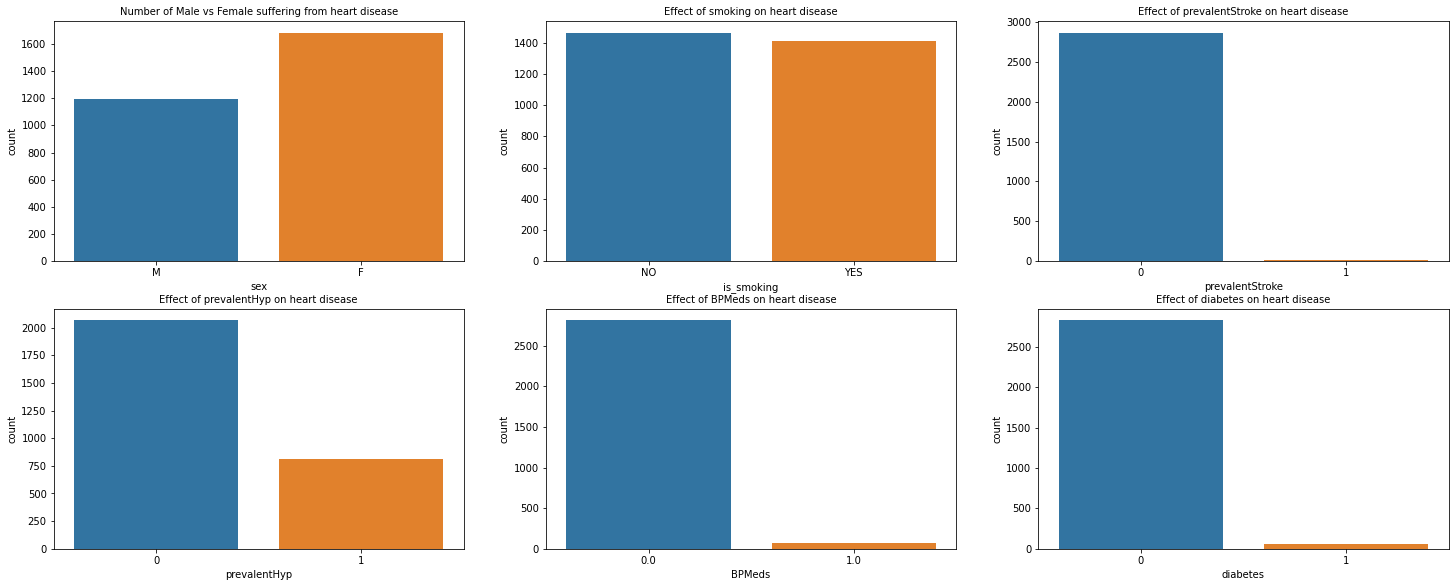

time: 850 ms (started: 2023-02-20 15:54:46 +00:00)


In [141]:
# Chart - 2 visualization code
#Effect of some continous features not considering CHD.
plt.figure(figsize=(25,15))

plt.subplot(3,3,1)
sns.countplot(df[df['TenYearCHD']==0]['sex'])
print(df[df['TenYearCHD']==0]['sex'].value_counts())
plt.title('Number of Male vs Female suffering from heart disease',size=10)

plt.subplot(3,3,2)
sns.countplot(df[df['TenYearCHD']==0]['is_smoking'])
print(df[df['TenYearCHD']==0]['is_smoking'].value_counts())
plt.title('Effect of smoking on heart disease',size=10)

plt.subplot(3,3,3)
sns.countplot(df[df['TenYearCHD']==0]['prevalentStroke'])
print(df[df['TenYearCHD']==0]['prevalentStroke'].value_counts())
plt.title('Effect of prevalentStroke on heart disease',size=10)

plt.subplot(3,3,4)
sns.countplot(df[df['TenYearCHD']==0]['prevalentHyp'])
print(df[df['TenYearCHD']==0]['prevalentHyp'].value_counts())
plt.title('Effect of prevalentHyp on heart disease',size=10)

plt.subplot(3,3,5)
sns.countplot(df[df['TenYearCHD']==0]['BPMeds'])
print(df[df['TenYearCHD']==0]['BPMeds'].value_counts())
plt.title('Effect of BPMeds on heart disease',size=10)

plt.subplot(3,3,6)
sns.countplot(df[df['TenYearCHD']==0]['diabetes'])
print(df[df['TenYearCHD']==0]['diabetes'].value_counts())
plt.title('Effect of diabetes on heart disease',size=10)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3(Percentage of education over people suffering from heart disease)

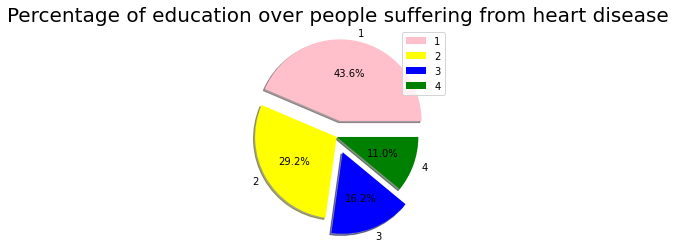

time: 131 ms (started: 2023-02-20 15:54:47 +00:00)


In [142]:
# Chart - 3 visualization code
labels = '1' , '2' , '3' , '4'
sizes = df.education.value_counts()
colors = ['pink', 'yellow','blue','green']
explode = (0.2, 0.0 , 0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of education over people suffering from heart disease",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4(Which Age Group is more vulnerable to CHD?)

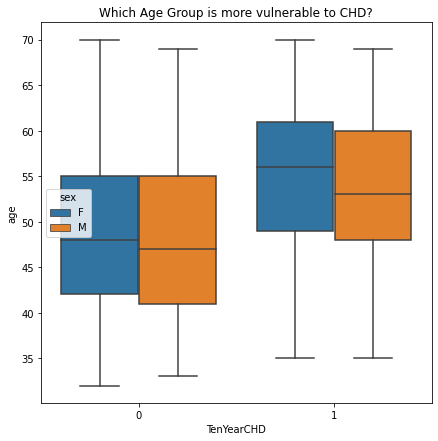

time: 212 ms (started: 2023-02-20 15:54:47 +00:00)


In [143]:
# Chart - 4 visualization code
plt.figure(figsize = (7,7))
sns.boxplot(df['TenYearCHD'], df['age'],hue=df['sex'])
plt.title("Which Age Group is more vulnerable to CHD?")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5(Are total cholestrol levels related to CHD ?)

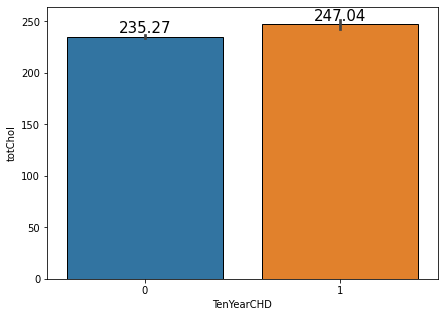

time: 196 ms (started: 2023-02-20 15:54:47 +00:00)


In [144]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['totChol'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6(Is glucose level cause of CHD?)

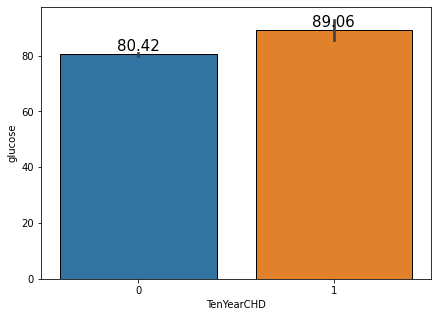

time: 193 ms (started: 2023-02-20 15:54:47 +00:00)


In [145]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7(How heartRate is related to CHD?)

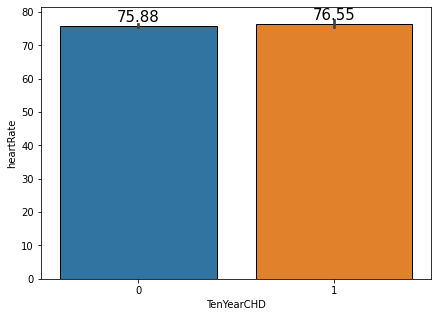

time: 254 ms (started: 2023-02-20 15:54:48 +00:00)


In [146]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8(How BMI is related to CHD?)

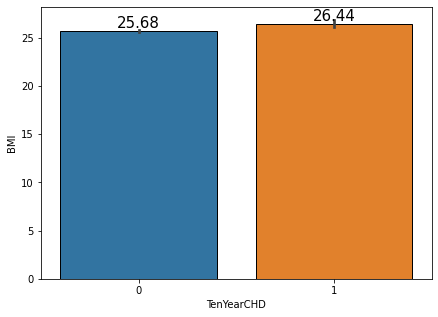

time: 195 ms (started: 2023-02-20 15:54:48 +00:00)


In [147]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['BMI'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9(Are patients with systolic BP at risk of CHD?)

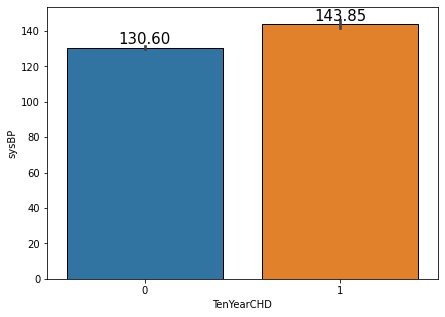

time: 217 ms (started: 2023-02-20 15:54:48 +00:00)


In [148]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10(Are patients with diastolic BP at risk of CHD?)

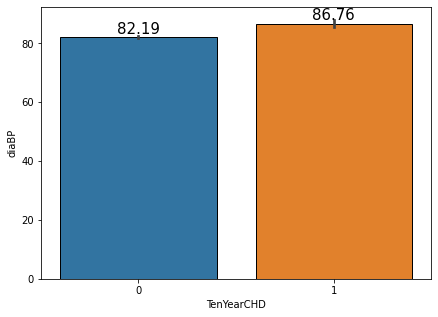

time: 232 ms (started: 2023-02-20 15:54:48 +00:00)


In [149]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0535f3c70>,
      dtype=object)

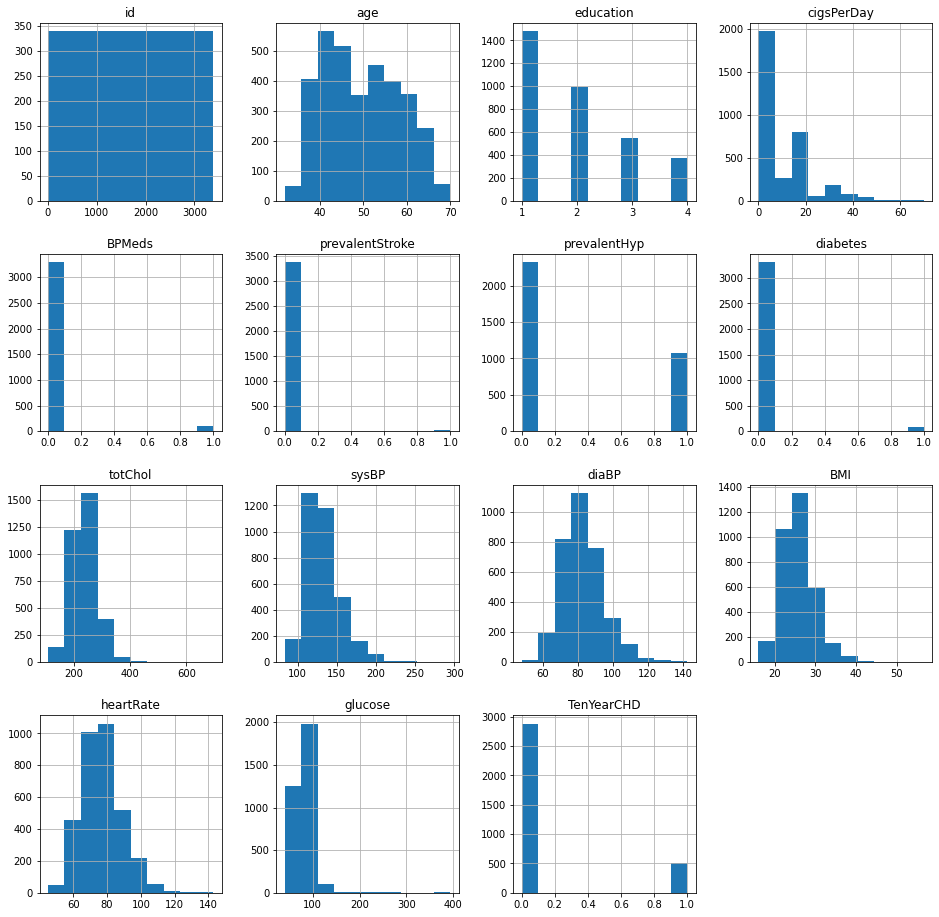

time: 2.88 s (started: 2023-02-20 15:54:49 +00:00)


In [150]:
# Chart - 11 visualization code
df.hist(figsize=(16,16))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [151]:
# Chart - 12 visualization code

time: 517 µs (started: 2023-02-20 15:54:52 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [152]:
# Chart - 13 visualization code

time: 486 µs (started: 2023-02-20 15:54:52 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [153]:
# Correlation Heatmap visualization code

time: 489 µs (started: 2023-02-20 15:54:52 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [154]:
# Pair Plot visualization code

time: 472 µs (started: 2023-02-20 15:54:52 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [155]:
# Perform Statistical Test to obtain P-Value

time: 453 µs (started: 2023-02-20 15:54:52 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [156]:
# Perform Statistical Test to obtain P-Value

time: 403 µs (started: 2023-02-20 15:54:52 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [157]:
# Perform Statistical Test to obtain P-Value

time: 516 µs (started: 2023-02-20 15:54:52 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [158]:
# Handling Missing Values & Missing Value Imputation

time: 503 µs (started: 2023-02-20 15:54:52 +00:00)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [159]:
#Separating Continous features
df.dtypes!=0

id                 True
age                True
education          True
sex                True
is_smoking         True
cigsPerDay         True
BPMeds             True
prevalentStroke    True
prevalentHyp       True
diabetes           True
totChol            True
sysBP              True
diaBP              True
BMI                True
heartRate          True
glucose            True
TenYearCHD         True
dtype: bool

time: 12.7 ms (started: 2023-02-20 15:54:52 +00:00)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [160]:
# Encode your categorical columns
df['sex'].replace({'M':0,'F':1},inplace=True)
df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

time: 16 ms (started: 2023-02-20 15:54:52 +00:00)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [161]:
# Expand Contraction

time: 516 µs (started: 2023-02-20 15:54:52 +00:00)


#### 2. Lower Casing

In [162]:
# Lower Casing

time: 400 µs (started: 2023-02-20 15:54:52 +00:00)


#### 3. Removing Punctuations

In [163]:
# Remove Punctuations

time: 447 µs (started: 2023-02-20 15:54:52 +00:00)


#### 4. Removing URLs & Removing words and digits contain digits.

In [164]:
# Remove URLs & Remove words and digits contain digits

time: 680 µs (started: 2023-02-20 15:54:52 +00:00)


#### 5. Removing Stopwords & Removing White spaces

In [165]:
# Remove Stopwords

time: 452 µs (started: 2023-02-20 15:54:52 +00:00)


In [166]:
# Remove White spaces

time: 467 µs (started: 2023-02-20 15:54:52 +00:00)


#### 6. Rephrase Text

In [167]:
# Rephrase Text

time: 443 µs (started: 2023-02-20 15:54:52 +00:00)


#### 7. Tokenization

In [168]:
# Tokenization

time: 464 µs (started: 2023-02-20 15:54:52 +00:00)


#### 8. Text Normalization

In [169]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

time: 477 µs (started: 2023-02-20 15:54:52 +00:00)


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [170]:
# POS Taging

time: 434 µs (started: 2023-02-20 15:54:52 +00:00)


#### 10. Text Vectorization

In [171]:
# Vectorizing Text

time: 477 µs (started: 2023-02-20 15:54:52 +00:00)


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [172]:
# Extracting a new feature MAP from existing feature sysBP and diaBP
df['MeanArterialPressure']= round((df['diaBP']+(df['sysBP']-df['diaBP'])/3),2)

time: 4.01 ms (started: 2023-02-20 15:55:43 +00:00)


In [70]:
# Extracting new feature glucose_diabetes with the help of Glucose and Diabetes
#df['glucose_diabetes'] = ((df['glucose'] > 140) & (df['diabetes'] == 1)).astype(int)

time: 15 ms (started: 2023-02-20 14:01:51 +00:00)


#### 2. Feature Selection

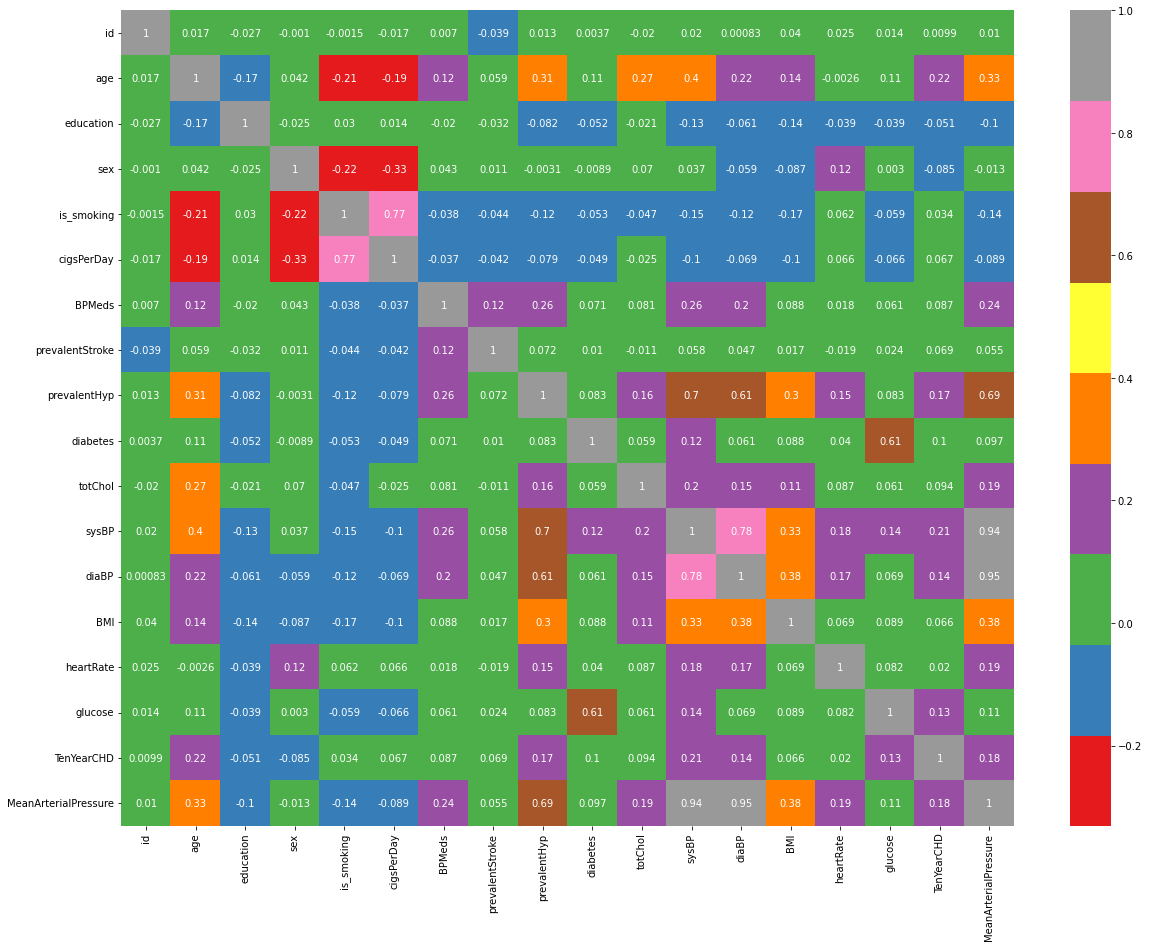

time: 1.71 s (started: 2023-02-20 15:56:00 +00:00)


In [173]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

In [174]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

time: 1.87 ms (started: 2023-02-20 15:56:45 +00:00)


In [175]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD']]])

,variables,VIF
0,age,4.101696e+01
1,education,4.578012e+00
2,sex,2.757819e+00
3,is_smoking,4.963119e+00
4,cigsPerDay,4.241500e+00
5,BPMeds,1.132940e+00
6,prevalentStroke,1.027047e+00
7,prevalentHyp,2.430505e+00
8,diabetes,1.585722e+00
9,totChol,3.099219e+01


time: 259 ms (started: 2023-02-20 15:57:21 +00:00)


In [176]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','diabetes','is_smoking','education']]])

,variables,VIF
0,age,38.387790
1,sex,2.702636
2,cigsPerDay,1.854736
3,BPMeds,1.124979
4,prevalentStroke,1.026121
5,prevalentHyp,2.200529
6,totChol,30.589727
7,BMI,43.134748
8,heartRate,38.657870
9,glucose,13.528635


time: 94.4 ms (started: 2023-02-20 15:57:50 +00:00)


In [178]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','diabetes','is_smoking','education','totChol']]])

,variables,VIF
0,age,34.492754
1,sex,2.675699
2,cigsPerDay,1.837993
3,BPMeds,1.124781
4,prevalentStroke,1.025148
5,prevalentHyp,2.174506
6,BMI,42.363561
7,heartRate,37.850232
8,glucose,13.490684
9,MeanArterialPressure,79.876806


time: 146 ms (started: 2023-02-20 15:59:00 +00:00)


In [179]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','diabetes','is_smoking','education','totChol','BMI']]])

,variables,VIF
0,age,33.706062
1,sex,2.657735
2,cigsPerDay,1.834766
3,BPMeds,1.123522
4,prevalentStroke,1.025104
5,prevalentHyp,2.124528
6,heartRate,36.565134
7,glucose,13.323446
8,MeanArterialPressure,61.178497


time: 85.2 ms (started: 2023-02-20 15:59:50 +00:00)


In [182]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','diabetes','is_smoking','education','totChol','BMI','heartRate','MeanArterialPressure','age']]])

,variables,VIF
0,sex,2.227108
1,cigsPerDay,1.569387
2,BPMeds,1.116091
3,prevalentStroke,1.023619
4,prevalentHyp,1.556717
5,glucose,3.501525


time: 90.9 ms (started: 2023-02-20 16:02:09 +00:00)


In [79]:
# Creating final dataframe considering above selected features
final_df= df[['sex','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','glucose','TenYearCHD']]

time: 3.54 ms (started: 2023-02-20 14:01:54 +00:00)


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [183]:
# Applying logarithmic transformation on age feature
final_df['age']=np.log(final_df['age']+1)

time: 3.88 ms (started: 2023-02-20 16:03:46 +00:00)


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [81]:
# Transform Your data

time: 542 µs (started: 2023-02-20 14:01:54 +00:00)


### 6. Data Scaling

In [184]:
# Scaling your data
x= final_df.drop(columns='TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]

time: 5.88 ms (started: 2023-02-20 16:04:07 +00:00)


In [185]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x= std_scaler.fit_transform(x)

time: 13.8 ms (started: 2023-02-20 16:04:19 +00:00)


In [84]:
# Scaling your data

time: 553 µs (started: 2023-02-20 14:01:54 +00:00)


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [85]:
# DImensionality Reduction (If needed)

time: 829 µs (started: 2023-02-20 14:01:54 +00:00)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [187]:
# Split your data to train and test. Choose Splitting ratio wisely.

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

time: 28.4 ms (started: 2023-02-20 16:05:46 +00:00)


In [86]:
# Split your data to train and test. Choose Splitting ratio wisely.

time: 859 µs (started: 2023-02-20 14:01:54 +00:00)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

In [189]:
# Handling Imbalanced Dataset (If needed)
print(final_df['TenYearCHD'].value_counts())
print(f"Percentage of majority(0) and minority class(1): {round(len(final_df[final_df['TenYearCHD']==0])*100/len(final_df['TenYearCHD']),2)} % and {round(len(final_df[final_df['TenYearCHD']==1])*100/len(final_df['TenYearCHD']),2)} %")

0    2879
1     511
Name: TenYearCHD, dtype: int64
Percentage of majority(0) and minority class(1): 84.93 % and 15.07 %
time: 8.19 ms (started: 2023-02-20 16:06:49 +00:00)


In [190]:
# Importing SMOTE for balancing the dataset
from imblearn.combine import SMOTETomek

# Handling class imbalance by oversampling followed by removing the Tomek link
x_smote, y_smote = SMOTETomek(random_state=0).fit_resample(x_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0             2303
1              409
dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0             2258
1             2258
dtype: int64 

time: 241 ms (started: 2023-02-20 16:07:02 +00:00)


##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [87]:
# Handling Imbalanced Dataset (If needed)

time: 778 µs (started: 2023-02-20 14:01:54 +00:00)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [191]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()

# Fit the Algorithm
logistic_classifier.fit(x_train,y_train)

# Predict the model
y_train_logistic_pred= logistic_classifier.predict(x_train)
y_test_logistic_pred= logistic_classifier.predict(x_test)

time: 26.5 ms (started: 2023-02-20 16:07:19 +00:00)


In [192]:
from sklearn.metrics import classification_report

# Classification report of training dataset
print(classification_report(y_test, y_test_logistic_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       576
           1       0.60      0.06      0.11       102

    accuracy                           0.85       678
   macro avg       0.73      0.53      0.51       678
weighted avg       0.82      0.85      0.80       678

time: 8.44 ms (started: 2023-02-20 16:07:29 +00:00)


In [193]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()

# Fit the Algorithm
logistic_classifier.fit(x_train,y_train)

# Predict the model
# y_train_logistic_pred= logistic_classifier.predict(x_smote)
y_test_smote_logistic_pred= logistic_classifier.predict(x_smote)

time: 57 ms (started: 2023-02-20 16:11:55 +00:00)


In [194]:
from sklearn.metrics import classification_report

# Classification report of training dataset
print(classification_report(y_smote, y_test_smote_logistic_pred))

              precision    recall  f1-score   support

           0       0.52      0.99      0.68      2258
           1       0.90      0.07      0.13      2258

    accuracy                           0.53      4516
   macro avg       0.71      0.53      0.40      4516
weighted avg       0.71      0.53      0.40      4516

time: 45 ms (started: 2023-02-20 16:12:11 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart

time: 623 µs (started: 2023-02-20 14:01:54 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 1.04 ms (started: 2023-02-20 14:01:54 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart

time: 576 µs (started: 2023-02-20 14:01:54 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 556 µs (started: 2023-02-20 14:01:54 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [93]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

time: 652 µs (started: 2023-02-20 14:01:54 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

time: 543 µs (started: 2023-02-20 14:01:54 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 542 µs (started: 2023-02-20 14:01:54 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [96]:
# Save the File

time: 528 µs (started: 2023-02-20 14:01:54 +00:00)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [97]:
# Load the File and predict unseen data.

time: 513 µs (started: 2023-02-20 14:01:54 +00:00)


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***